# Illinois State Employee Pay Hired After 2011
### by Tianli Chen

## Dataset Summary
* The name of this dataset: State Employee Pay hired after 1.1.2011.
* The dataset was obtained on State of Illinois Data Protal: https://data.illinois.gov/dataset/725state_employee_pay_hired_after_112011
* We can download this dataset from this url: https://data.illinois.gov/datastore/dump/1a0cd05c-7d17-4e3d-938d-c2bfa2a4a0b1.
* The lisence of this dataset is `Creative Commons Attribution License (cc-by)`. This license lets others distribute, remix, adapt, and build upon your work, even commercially, as long as they credit you for the original creation. This is the most accommodating of licenses offered(https://creativecommons.org/licenses/).
* This dataset is 35.7 MB big consisting of 1 csv document.
* This dataset is a listing of all employees hired after 1/1/2011. The fields include Year, Agency, Agency Division, Employee Name, Position Title, Work Country, YTD gross, Period pay rate, etc. Each row represents an employee. Tha data type of YTD gross and Period pay rate are float8, the data type of Year is int4, the data type of other columns are text.

## Read data

In [1]:
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('1a0cd05c-7d17-4e3d-938d-c2bfa2a4a0b1.csv')

In [3]:
a = data.groupby(['Year','Agency'])['YTD Gross'].mean().unstack()
average_salary = a.mean(axis=1)

### With the following visualization, users can explore the average salary of the employees in each agency. There are totally 71 agencies in the dataset. Therefore, I choose to display 10 agencies in each page. The users can select which page to display. After selecting a page, users can see the trend of average salary of employees in each agency in the upper visualization. They can also see the ranking of the average salary paid by each agency in the lower visualization. There are some 'incomplete' lines in the upper visualization, meaning that there is no employee hired by that agency in that period of time.

In [4]:
@ipywidgets.interact(page=[i for i in range(1,9)])
def _plot(page):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    start = int(page*10-10)
    end = int(page*10)
    a.iloc[:,start:end].plot(ax=ax1,figsize=(12,10),ylabel = 'Average Salary')
    data.groupby('Year')['YTD Gross'].mean().plot(ax=ax1,legend=True,color = 'black')
    a.mean(axis=0)[start:end].sort_values().plot(ax=ax2,kind='bar',color = 'black',ylabel='Average Salary')

interactive(children=(Dropdown(description='page', options=(1, 2, 3, 4, 5, 6, 7, 8), value=1), Output()), _dom…

### In my opinion, users may also care about other information in this dataset. For example, they might wonder which county pay the highest average salary. They can explore this information in the following visualization. The visualization on the top shows the average salary of each selected column. and the lower column shows the ranking of the average salary by the selected column.

In [5]:
@ipywidgets.interact(x_axis=['Agency','Work County',
                            'Collective or Merit','Employment Status'], start_year=[i for i in range(2011,2022)])
def plot_(x_axis):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    data.groupby(x_axis)['YTD Gross'].mean().plot(kind='bar',figsize = (12,4),ax=ax1,xlabel=x_axis,ylabel='count',color='black')
    data.groupby(x_axis)['YTD Gross'].mean().sort_values().head(10).plot(kind='barh',figsize = (13,10),ax=ax2,xlabel=x_axis,ylabel='count',color='black')
    fig.tight_layout()

interactive(children=(Dropdown(description='x_axis', options=('Agency', 'Work County', 'Collective or Merit', …

### We can see the ranking of average salary paid by each agency. The Health & Family Service paid most during this priod. Revenue agency is the second.

### I also found another dataset that might be relevant to this dataset:
- the medium household income in Illinois: https://fred.stlouisfed.org/series/MEHOINUSILA646N.
This dataset contains the medium household income of Illinois from 1981 to 2019.

### In order to compare the average salary of the state employees and the medium household income, I made the following visualization:

In [6]:
medium_income = pd.read_csv('MEHOINUSILA646N.csv')
medium_income.rename(columns = {'MEHOINUSILA646N':'Illinois state medium income'},inplace=True) #rename the column
income = medium_income['Illinois state medium income']
year = [str(i)[:4] for i in  medium_income['DATE']] 
medium_income['Illinois state employees salary'] = [i for i in data.groupby('Year')['YTD Gross'].mean()[:-2]] # Add a column
medium_income

,DATE,Illinois state medium income,Illinois state employees salary
0,2011-01-01,50637,33769.185737
1,2012-01-01,51738,47624.008297
2,2013-01-01,53937,46084.830397
3,2014-01-01,54916,55225.384959
4,2015-01-01,60413,51439.522045
5,2016-01-01,61386,53942.988298
6,2017-01-01,65969,52489.737065
7,2018-01-01,70145,52214.650189
8,2019-01-01,74399,56324.326067


<Figure size 432x288 with 0 Axes>

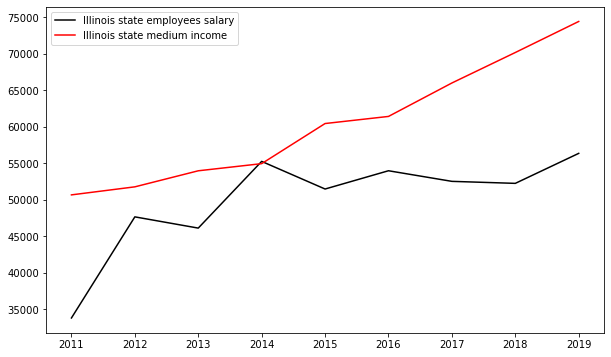

In [7]:
plt.clf()
plt.figure(figsize=(10,6))
plt.plot(year,medium_income['Illinois state employees salary'],label='Illinois state employees salary',color='black')
plt.plot(year,medium_income['Illinois state medium income'],label='Illinois state medium income',color='red')
plt.legend(loc='upper left')
plt.show()

### It is interesting to compare these two lines. We can see that the salary of state employees are lower that the state medium income during 2011 to 2019 except year 2014.

The following picture is a screenshot of a visualization on DATAUSA(https://datausa.io/profile/geo/illinois). This visualization shows the amount of employees in different fields. This visualization is interactive.

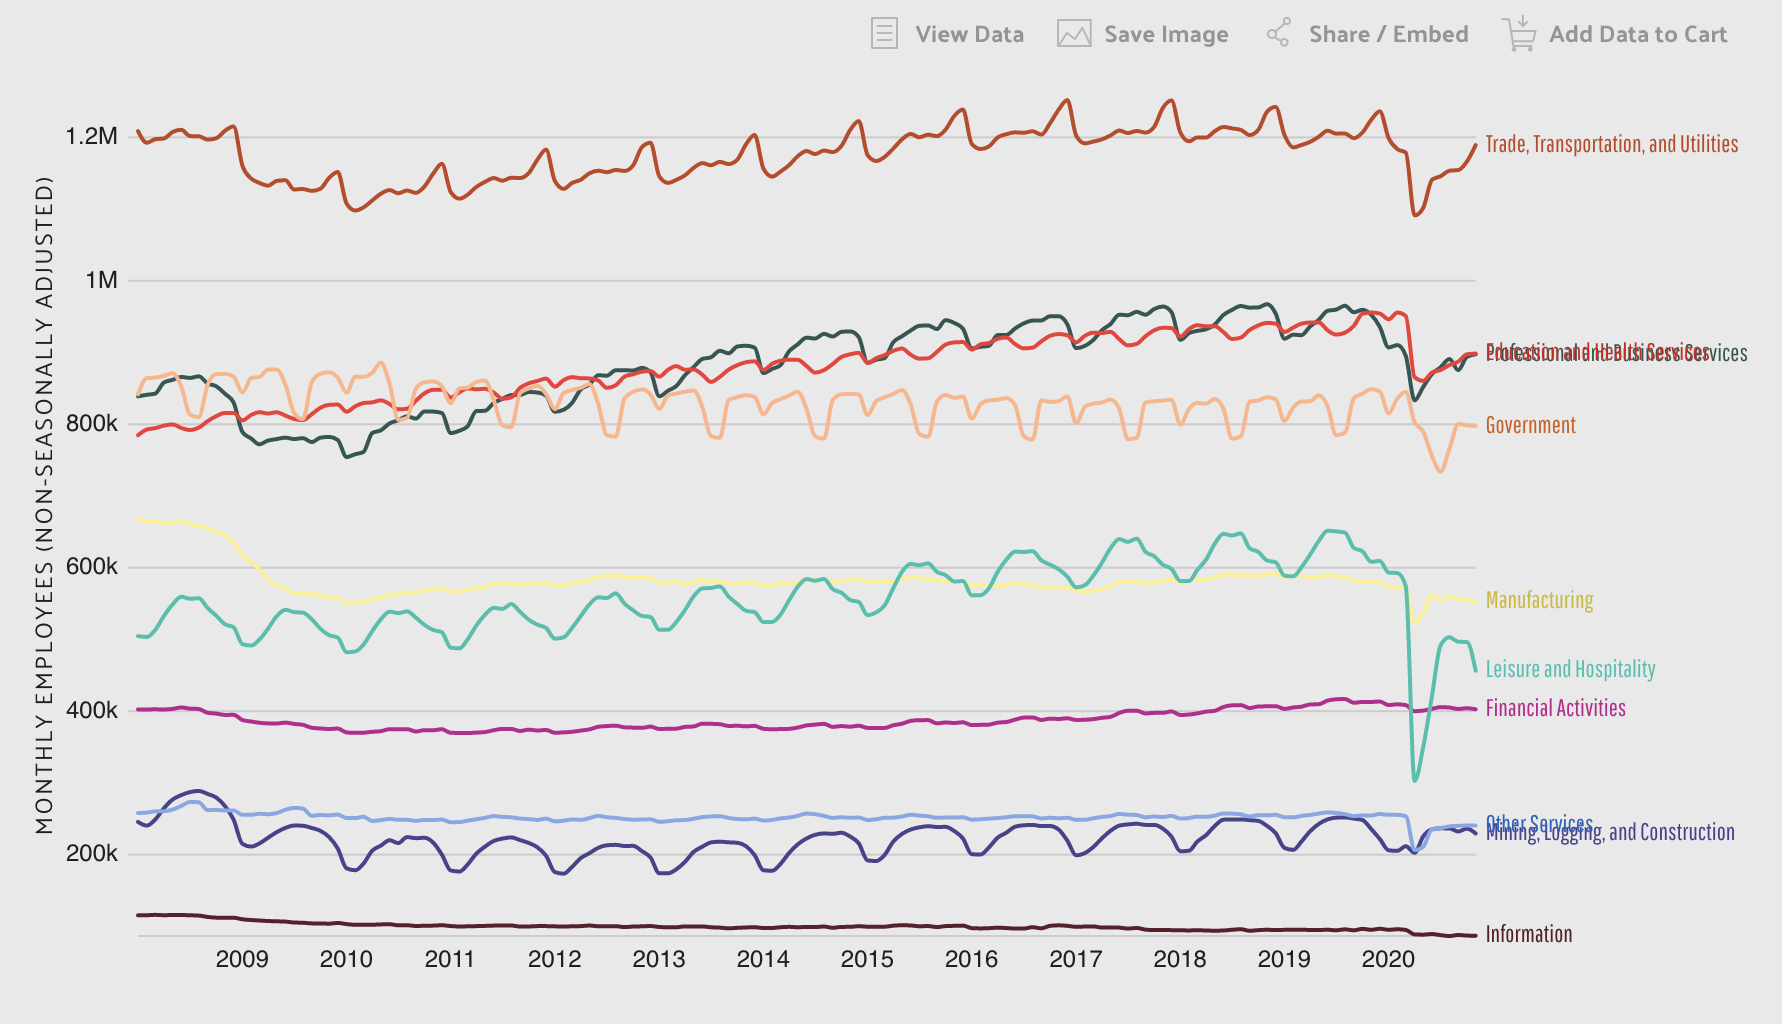